# IMAGE CLASSIFICATION

### Importing the libraries

In [1]:
!pip install joblib

In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import pywt
import json
import shutil
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Image Preprocessing

In [3]:
img = cv2.imread('./Test_images/AmeEar1.jpg')
img.shape

(201, 251, 3)

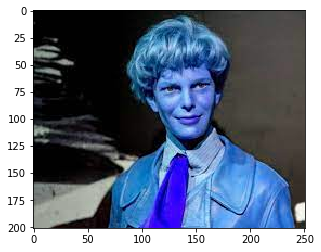

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(201, 251)

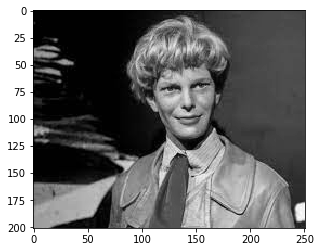

In [6]:
plt.imshow(gray, cmap = 'gray')

In [7]:
gray

array([[  1,   1,   1, ...,  69,  69,  69],
       [  1,   1,   1, ...,  69,  69,  69],
       [  1,   1,   1, ...,  69,  69,  69],
       ...,
       [154, 154, 155, ...,  37,  36,  33],
       [154, 154, 155, ...,  51,  48,  44],
       [152, 152, 153, ...,  41,  41,  41]], dtype=uint8)

In [8]:
eye_cascade = cv2.CascadeClassifier('./Opencv/Haar_Cascades/haarcascade_eye.xml')
face_cascade  = cv2.CascadeClassifier('./Opencv/Haar_Cascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[109,  46,  66,  66]], dtype=int32)

In [9]:
(x, y, w, h) = faces[0]
x, y, w, h

(109, 46, 66, 66)

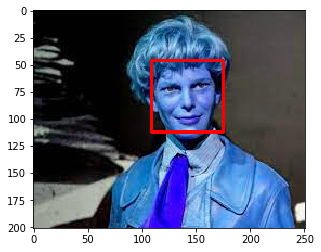

In [10]:
face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(face_img)

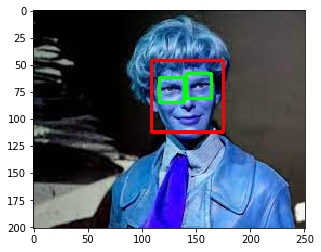

In [11]:
cv2.destroyAllWindows()
for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y : y+h, x : x+w]
    roi_color = face_img[y : y+h, x : x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()


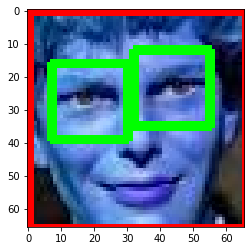

In [12]:
plt.imshow(roi_color, cmap = 'gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

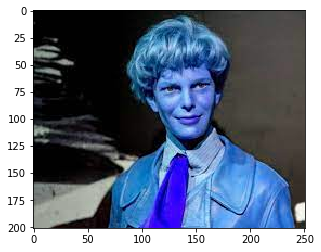

In [14]:
original_image = cv2.imread('./Test_images/AmeEar1.jpg')
plt.imshow(original_image)

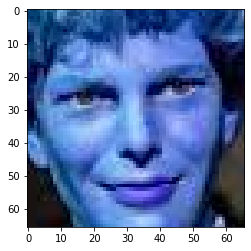

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./Test_images/AmeEar1.jpg')
plt.imshow(cropped_image)

## Wavelet Transform is applied on images to enhance the important regions of the face.

In [16]:
def waveletTransform(img, mode = 'haar', level = 1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

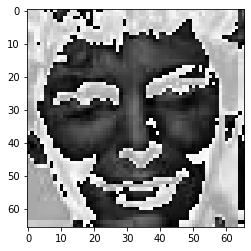

In [17]:
im_har = waveletTransform(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

## STEPS
* Reading the original images
* Cropping the faces
* Storing the croppe faces in a different folder

In [18]:
path_to_data = "./Dataset/"
path_to_cr_data = "./Dataset/Cropped/"

In [19]:
img_dirs = []
for entry in os.scandir(path_to_data): # go through all the sub directories
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./Dataset/Chris Hemsworth',
 './Dataset/Elizabeth Olsen',
 './Dataset/Mark Ruffalo',
 './Dataset/Robert Downey',
 './Dataset/Scarlett Johansson']

In [21]:
if os.path.exists(path_to_cr_data): # if exists deleting and creating a new folder
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
for img_dir in img_dirs:
    count = 1
    student_name = img_dir.split('/')[-1] #splitting and taking the student name
    print(student_name)

Chris Hemsworth
Elizabeth Olsen
Mark Ruffalo
Robert Downey
Scarlett Johansson


In [23]:
cropped_image_dirs = []
student_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    student_name = img_dir.split('/')[-1] #splitting and taking the student name
    print(student_name)
    
    student_file_names_dict[student_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + student_name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder : ", cropped_folder)
                
            cropped_file_name = student_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            student_file_names_dict[student_name].append(cropped_file_path)
            count += 1  

Chris Hemsworth
Generating cropped images in folder :  ./Dataset/Cropped/Chris Hemsworth
Elizabeth Olsen
Generating cropped images in folder :  ./Dataset/Cropped/Elizabeth Olsen
Mark Ruffalo
Generating cropped images in folder :  ./Dataset/Cropped/Mark Ruffalo
Robert Downey
Generating cropped images in folder :  ./Dataset/Cropped/Robert Downey
Scarlett Johansson
Generating cropped images in folder :  ./Dataset/Cropped/Scarlett Johansson


In [24]:
student_file_names_dict2 = {}

for img_dir in cropped_image_dirs:
    student_name = img_dir.split('/')[-1]
    file_list = []
    
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        
    student_file_names_dict2[student_name] = file_list

student_file_names_dict2

{'Chris Hemsworth': ['./Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth1.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth10.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth11.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth12.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth13.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth14.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth15.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth16.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth17.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth2.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth3.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth4.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth5.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth6.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth7.png',
  './Dataset/Cropped/Chris Hemsworth\\Chris Hemsworth8.png

In [25]:
class_dict = {}
count = 0

for student_name in student_file_names_dict2.keys():
    class_dict[student_name] = count
    count += 1
    
class_dict

{'Chris Hemsworth': 0,
 'Elizabeth Olsen': 1,
 'Mark Ruffalo': 2,
 'Robert Downey': 3,
 'Scarlett Johansson': 4}

In [26]:
X, y = [], []

for student_name, training_files in student_file_names_dict2.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = waveletTransform(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3, 1), scaled_img_har.reshape(32*32, 1)))
        
        X.append(combined_img)
        y.append(class_dict[student_name])

In [27]:
X, y, X_raw = [], [], []
for student_name, training_files in student_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = waveletTransform(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        X_raw.append(img_har)
        y.append(class_dict[student_name])

In [28]:
print(len(X))
print(len(X[0]))
print(len(y))

116
4096
116


In [29]:
32*32*3 + 32*32

4096

In [30]:
X[0].shape

(4096, 1)

In [31]:
X

[array([[111],
        [148],
        [140],
        ...,
        [230],
        [234],
        [  9]], dtype=uint8),
 array([[33],
        [29],
        [33],
        ...,
        [ 5],
        [11],
        [66]], dtype=uint8),
 array([[54],
        [37],
        [28],
        ...,
        [21],
        [23],
        [ 8]], dtype=uint8),
 array([[255],
        [255],
        [255],
        ...,
        [122],
        [113],
        [ 16]], dtype=uint8),
 array([[ 13],
        [ 30],
        [ 59],
        ...,
        [186],
        [ 93],
        [  8]], dtype=uint8),
 array([[22],
        [27],
        [45],
        ...,
        [36],
        [27],
        [12]], dtype=uint8),
 array([[19],
        [19],
        [30],
        ...,
        [39],
        [14],
        [ 3]], dtype=uint8),
 array([[14],
        [13],
        [15],
        ...,
        [48],
        [50],
        [48]], dtype=uint8),
 array([[22],
        [25],
        [43],
        ...,
        [ 5],
        [11],
   

In [32]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(116, 4096)

# Model training

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA as RandomizedPCA

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C= 20))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6206896551724138

### Splitting the Data

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 9, test_size = 0.05, stratify = y)

In [51]:
X_train.shape

(110, 4096)

In [52]:
X_train = X_train.reshape(len(X_train), 4096)

### Applying Principal Component Analysis

In [53]:
n_components = 10
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

In [54]:
X_train = np.array(X_train)

In [55]:
eigenfaces = pca.components_.reshape((n_components,  4096))

In [56]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

### Creating a Pipeline

In [57]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C= 20))])
pipe.fit(X_train_pca, y_train)
pipe.score(X_test_pca, y_test)

0.5

In [58]:
print(classification_report(y_test, pipe.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       1.00      0.50      0.67         2
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1

    accuracy                           0.50         6
   macro avg       0.47      0.50      0.43         6
weighted avg       0.56      0.50      0.47         6



In [59]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,50,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [60]:
scores = []
best_estimators = {}

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv = 5, return_train_score = False)
    clf.fit(X_train, y_train)
    
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,svm,0.636364,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.472727,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.690909,{'logisticregression__C': 1}


In [61]:
best_estimators

{'svm': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('svc',
                  SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                      coef0=0.0, decision_function_shape='ovr', degree=3,
                      gamma='auto', kernel='linear', max_iter=-1,
                      probability=True, random_state=None, shrinking=True,
                      tol=0.001, verbose=False))],
          verbose=False),
 'random_forest': Pipeline(memory=None,
          steps=[('standardscaler',
                  StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                   

In [62]:
best_estimators['svm'].score(X_test, y_test)

0.8333333333333334

In [63]:
best_estimators['random_forest'].score(X_test, y_test)

0.5

In [64]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6666666666666666

In [65]:
best_clf = best_estimators['svm']
best_clf

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='linear', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [66]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

Text(69.0, 0.5, 'Truth')

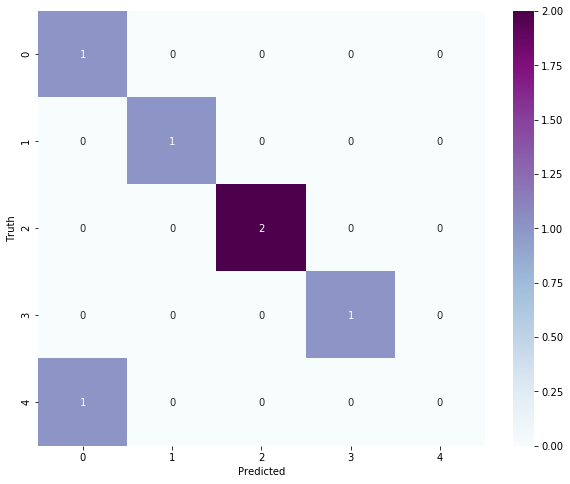

In [67]:
plt.figure(figsize = (10, 8))
sns.heatmap(cm, annot = True, cmap = 'BuPu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
class_dict

{'Chris Hemsworth': 0,
 'Elizabeth Olsen': 1,
 'Mark Ruffalo': 2,
 'Robert Downey': 3,
 'Scarlett Johansson': 4}

# Saving the trained model

In [69]:
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [70]:
# saving class dictionary
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))

In [87]:
path = "./Test_images/grp1.jfif"
roi_color = get_cropped_image_if_2_eyes(path)
if roi_color is not None:
    cropped_folder = path.split('/')[1] + 'grp_pic1'

    if not os.path.exists(cropped_folder):
        os.makedirs(cropped_folder)
        cropped_image_dirs.append(cropped_folder)
        print("Generating cropped images in folder : ", cropped_folder)

    cropped_file_name = student_name + str(count) + ".png"
    cropped_file_path = cropped_folder + "/" + cropped_file_name

    cv2.imwrite(cropped_file_path, roi_color)
    student_file_names_dict[student_name].append(cropped_file_path)
    count += 1  

Generating cropped images in folder :  Test_imagesgrp_pic1


In [98]:
def detect_face():
  img = cv2.imread('GroupPics/T1.jfif')
  faces = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
  print("Total Faces:",len(faces))
  print("Face Coordinates:\n",faces)
  return img, faces

In [99]:
img, faces = detect_face()
for x,y,w,h in faces:
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)

Total Faces: 2
Face Coordinates:
 [[118  35  69  69]
 [188  36  79  79]]


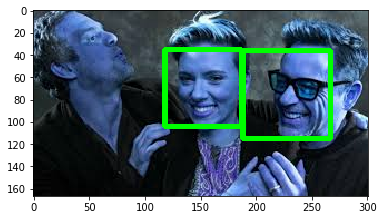

In [101]:
plt.imshow(img)

In [102]:
i = 1
for x, y, w, h in faces:
  cv2.imwrite('{}.jpg'.format(i), img[y:y+h, x:x+w])
  i += 1

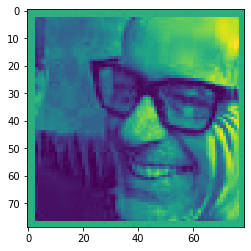

In [104]:
for i in range(1, (len(faces)+1)):
  plt.imshow(cv2.imread('{}.jpg'.format(i), 0))